## The dataset used here is the Telco Churn Dataset which is used to work out the customer retention.

## The Machine Learning Algorithm used is the XGBoost

The dataset can be found on Kaggle(https://www.kaggle.com/blastchar/telco-customer-churn)

# First we import all the libraries

In [39]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer,confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the Dataset

In [40]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis(EDA)

In [41]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [44]:
#We want to change the TotalCharges column value from object to numeric as it is a column full of numbers.

#df['Total_Charges']=pd.to_numeric(df['TotalCharges'])

#The code above does not function as we see that there are empty objects, so there is a parsing error.
#We get an error for parsing at the position 488

In [45]:
#There maybe more empty values but since we know about the position 488 by running the above code, here it is below. 
df.iloc[488]['TotalCharges']
#We see an empty object

' '

In [46]:
#First we want to see in how many positions the above situation is true.

len(df.loc[df['TotalCharges']==' '])

11

In [47]:
#we see the position of the places where those values are missing
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [48]:
#Since we see that the people who have empty spaces in their TotalCharges have the value "0" in their tenure,
#we can change the value of those empty spaces to zeros. 
#Alert: It is completely possible for people to have used the service and not have paid but since the tenure is "0", 
#it is safe to assume that the TotalCharges will also be zero.

df.loc[(df['TotalCharges']==' '),'TotalCharges']=0

In [49]:
#Now we can see that whenever the tenure=0, the TotalCharges for those months have been converted to zero.
df.loc[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [50]:
#Now we convert the TotalCharges column to numeric using pd.to_numeric(converting from object to numeric)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [51]:
df.TotalCharges.dtypes

dtype('float64')

In [52]:
df.replace(' ','_',regex=True,inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No_phone_service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No_phone_service,DSL,Yes,...,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber_optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


# Breaking it down to train and test dataset

In [53]:
#breaking the data down into X and y... X is for training dataset, y is for test dataset
X=df.iloc[:,:-1]

In [54]:
X.shape

(7043, 20)

In [55]:
y=df.iloc[:,-1]

In [56]:
#Don't think the customerID has any bearing on the tenure or the customer churn.
X.drop('customerID',inplace=True,axis=1)

In [57]:
y.shape

(7043,)

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [59]:
print(df.gender.nunique())
print(df.gender.unique())

2
['Female' 'Male']


In [60]:
print(df.tenure.nunique())
print(df.tenure.unique())

73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


In [61]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [62]:
#using one hot encoding to get dummies for all the categorical values.
#since from the above information that there are 16 objects in the information above

X_encoded=pd.get_dummies(data=X,columns=['gender',
                                'Partner', 
                                'Dependents',
                                'PhoneService', 
                                'MultipleLines', 
                                'InternetService', 
                                'OnlineSecurity',
                                'OnlineBackup',
                                'DeviceProtection', 
                                'TechSupport', 
                                'StreamingTV',
                                'StreamingMovies', 
                                'Contract', 
                                'PaperlessBilling', 
                                'PaymentMethod'])

In [63]:
X_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet_service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One_year',
       'Contract_Two_year', '

In [64]:
#this is to check that we have only two distinct values for the churn column
y.unique()

array(['No', 'Yes'], dtype=object)

In [65]:
y=y.replace(['No','Yes'],[0,1])

In [66]:
y.unique()

array([0, 1], dtype=int64)

# Deploying XGBoost Algorithm

In [67]:
sum(y)/len(y)

0.2653698707936959

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42,stratify=y)

In [69]:
#tocheck if the the stratification worked
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.2654297614539947
0.26519023282226006


In [70]:
#since xgBoost works with a logistic classifier
#verbose=True--shows us how and as it's happening
#early_stopping_rounds--the number of rounds it will at max keep going until no significant changes are happening
#evaluating how many trees to build based on the testing dataset

classification_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42)
classification_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])


[0]	validation_0-aucpr:0.63160
[1]	validation_0-aucpr:0.64538
[2]	validation_0-aucpr:0.64402
[3]	validation_0-aucpr:0.64429
[4]	validation_0-aucpr:0.63866
[5]	validation_0-aucpr:0.63419
[6]	validation_0-aucpr:0.63912
[7]	validation_0-aucpr:0.63787
[8]	validation_0-aucpr:0.63779
[9]	validation_0-aucpr:0.63894
[10]	validation_0-aucpr:0.63680


C:\Users\Abhiroop Chakraborty\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

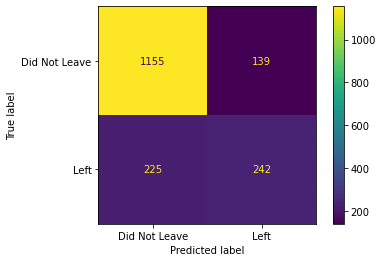

In [71]:
#we see that XGBoost without optimization does a good work on people who did not leave. 
plot_confusion_matrix(classification_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did Not Leave','Left'])

In [73]:
#let's use GridSearchCV to build the right estimator with the best parameters to fit the model
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid1={'max_depth':[3,4,5],
           'learning_rate':[0.1,0.01,0.05],
           'gamma':[0,0.25,1.0],
           'reg_lambda':[0,1.0,10],
           'scale_pos_weight':[1,3,5]}

In [76]:
optimal_params=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                        seed=42,
                                                        subsample=0.9,
                                                        cosample_bytree=0.5),
                            param_grid=param_grid1,
                            scoring='roc_auc',
                            n_jobs=10,
                            cv=3,
                            verbose=0)

In [78]:
optimal_params.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)])

[11:45:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { cosample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82718
[1]	validation_0-auc:0.83329
[2]	validation_0-auc:0.83433
[3]	validation_0-auc:0.83752
[4]	validation_0-auc:0.83752


C:\Users\Abhiroop Chakraborty\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[5]	validation_0-auc:0.83869
[6]	validation_0-auc:0.83900
[7]	validation_0-auc:0.83958
[8]	validation_0-auc:0.84024
[9]	validation_0-auc:0.84002
[10]	validation_0-auc:0.84034
[11]	validation_0-auc:0.84072
[12]	validation_0-auc:0.84140
[13]	validation_0-auc:0.84157
[14]	validation_0-auc:0.84192
[15]	validation_0-auc:0.84192
[16]	validation_0-auc:0.84203
[17]	validation_0-auc:0.84224
[18]	validation_0-auc:0.84289
[19]	validation_0-auc:0.84290
[20]	validation_0-auc:0.84316
[21]	validation_0-auc:0.84400
[22]	validation_0-auc:0.84434
[23]	validation_0-auc:0.84437
[24]	validation_0-auc:0.84432
[25]	validation_0-auc:0.84520
[26]	validation_0-auc:0.84530
[27]	validation_0-auc:0.84533
[28]	validation_0-auc:0.84511
[29]	validation_0-auc:0.84525
[30]	validation_0-auc:0.84540
[31]	validation_0-auc:0.84538
[32]	validation_0-auc:0.84521
[33]	validation_0-auc:0.84522
[34]	validation_0-auc:0.84502
[35]	validation_0-auc:0.84535
[36]	validation_0-auc:0.84555
[37]	validation_0-auc:0.84564
[38]	validation

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, cosample_bytree=0.5,
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_e..._jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                

In [79]:
print(optimal_params.best_params_)

{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 3}


In [80]:
param_grid2={'max_depth':[4],
           'learning_rate':[0.05,0.1,1],
           'gamma':[0],
           'reg_lambda':[10,20,100],
           'scale_pos_weight':[3]}
optimal_params=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                        seed=42,
                                                        subsample=0.9,
                                                        cosample_bytree=0.5),
                            param_grid=param_grid2,
                            scoring='roc_auc',
                            n_jobs=10,
                            cv=3,
                            verbose=0)

In [81]:
optimal_params.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)])

[11:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { cosample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82718
[1]	validation_0-auc:0.83329
[2]	validation_0-auc:0.83433
[3]	validation_0-auc:0.83752
[4]	validation_0-auc:0.83752


C:\Users\Abhiroop Chakraborty\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[5]	validation_0-auc:0.83869
[6]	validation_0-auc:0.83900
[7]	validation_0-auc:0.83958
[8]	validation_0-auc:0.84024
[9]	validation_0-auc:0.84002
[10]	validation_0-auc:0.84034
[11]	validation_0-auc:0.84072
[12]	validation_0-auc:0.84140
[13]	validation_0-auc:0.84157
[14]	validation_0-auc:0.84192
[15]	validation_0-auc:0.84192
[16]	validation_0-auc:0.84203
[17]	validation_0-auc:0.84224
[18]	validation_0-auc:0.84289
[19]	validation_0-auc:0.84290
[20]	validation_0-auc:0.84316
[21]	validation_0-auc:0.84400
[22]	validation_0-auc:0.84434
[23]	validation_0-auc:0.84437
[24]	validation_0-auc:0.84432
[25]	validation_0-auc:0.84520
[26]	validation_0-auc:0.84530
[27]	validation_0-auc:0.84533
[28]	validation_0-auc:0.84511
[29]	validation_0-auc:0.84525
[30]	validation_0-auc:0.84540
[31]	validation_0-auc:0.84538
[32]	validation_0-auc:0.84521
[33]	validation_0-auc:0.84522
[34]	validation_0-auc:0.84502
[35]	validation_0-auc:0.84535
[36]	validation_0-auc:0.84555
[37]	validation_0-auc:0.84564
[38]	validation

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, cosample_bytree=0.5,
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
   

In [82]:
print(optimal_params.best_params_)

{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 3}


In [83]:
classification_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42,
                                     gamma=0,
                                     learning_rate=0.05,
                                     max_depth=4,
                                     reg_lambda=10,
                                     scale_pos_weight=3,
                                     subsample=0.9,
                                     cosample_bytree=0.5
                                    )
classification_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])


[12:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { cosample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.59010
[1]	validation_0-aucpr:0.60224
[2]	validation_0-aucpr:0.60434
[3]	validation_0-aucpr:0.60323
[4]	validation_0-aucpr:0.60284
[5]	validation_0-aucpr:0.60416


C:\Users\Abhiroop Chakraborty\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[6]	validation_0-aucpr:0.60944
[7]	validation_0-aucpr:0.60948
[8]	validation_0-aucpr:0.61079
[9]	validation_0-aucpr:0.61093
[10]	validation_0-aucpr:0.61360
[11]	validation_0-aucpr:0.61522
[12]	validation_0-aucpr:0.61612
[13]	validation_0-aucpr:0.61626
[14]	validation_0-aucpr:0.61705
[15]	validation_0-aucpr:0.62567
[16]	validation_0-aucpr:0.62459
[17]	validation_0-aucpr:0.62426
[18]	validation_0-aucpr:0.62572
[19]	validation_0-aucpr:0.62564
[20]	validation_0-aucpr:0.62558
[21]	validation_0-aucpr:0.63365
[22]	validation_0-aucpr:0.63336
[23]	validation_0-aucpr:0.63319
[24]	validation_0-aucpr:0.63272
[25]	validation_0-aucpr:0.63859
[26]	validation_0-aucpr:0.63962
[27]	validation_0-aucpr:0.63976
[28]	validation_0-aucpr:0.63885
[29]	validation_0-aucpr:0.63965
[30]	validation_0-aucpr:0.64016
[31]	validation_0-aucpr:0.64187
[32]	validation_0-aucpr:0.63810
[33]	validation_0-aucpr:0.63768
[34]	validation_0-aucpr:0.63565
[35]	validation_0-aucpr:0.63490
[36]	validation_0-aucpr:0.63527
[37]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, cosample_bytree=0.5,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=3, seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

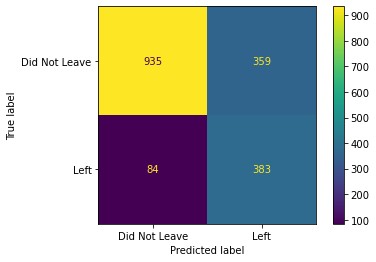

In [85]:
#XGBoost with optimization does good work on people who left. 
plot_confusion_matrix(classification_xgb,
                      X_test,
                      y_test,
                      display_labels=['Did Not Leave','Left'])

In [94]:
y_test.value_counts()
#so we can see that using the XGBoost Optimization we were able to predict 359/467~83.51% of people who left,correctly.
#previously, before optimization we were able to predict only 242/467~52% of the people who left, correctly.

0    1294
1     467
Name: Churn, dtype: int64